In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datamol as dm

In [92]:
data = pd.read_csv('chembl253.csv', delimiter=";")

C:\Users\user\AppData\Local\Temp\ipykernel_9032\122649876.py:1: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('chembl253.csv', delimiter=";")


In [93]:
data.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [94]:
data.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL1828806,NaN,NaN,356.47,1.0,6.24,18,CCCCCn1cc(C(=O)Nc2ccc3ccccc3c2)c2ccccc21,Ki,'=',...,SINGLE PROTEIN,CHEMBL1828497,1,Scientific Literature,Eur J Med Chem,2011.0,CHEMBL3308072,NaN,NaN,NaN
1,CHEMBL157591,NaN,NaN,520.96,2.0,5.13,74,C/N=C(\NS(=O)(=O)c1cccc(C(F)(F)F)c1)N1CC(c2ccc...,Ki,'>',...,SINGLE PROTEIN,CHEMBL1148395,1,Scientific Literature,J Med Chem,2004.0,CHEMBL3308072,NaN,NaN,NaN
2,CHEMBL583855,NaN,NaN,443.38,1.0,5.54,3,CCc1c(C(=O)NN2CCCCC2)nc(-c2ccccc2Cl)n1-c1ccc(C...,Ki,'>',...,SINGLE PROTEIN,CHEMBL1156813,1,Scientific Literature,J Med Chem,2010.0,CHEMBL3308072,NaN,NaN,NaN
3,CHEMBL596626,NaN,NaN,369.90,0.0,4.53,16,Cc1nc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Cl)n1-c1ccccc1,EC50,'=',...,SINGLE PROTEIN,CHEMBL1158524,1,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN,NaN,NaN
4,CHEMBL597438,NaN,NaN,391.56,1.0,5.22,13,CCCCc1c(C(=O)NC23CC4CC(CC(C4)C2)C3)nc(C)n1-c1c...,EC50,'=',...,SINGLE PROTEIN,CHEMBL1158524,1,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN,NaN,NaN


In [95]:
df = data[['Molecule ChEMBL ID', 'Smiles', 'Standard Type','Standard Value', 'Standard Units']].copy()
df.rename(columns = {'Molecule ChEMBL ID':'id', 'Smiles': 'smiles', 'Standard Type': 'value_type', 'Standard Value' : 'value', 'Standard Units' : 'units'}, inplace=True)

In [96]:
df['units'].unique()

array(['nM', '%', nan, 'kcal/mol', 'degrees C', '10^3nM'], dtype=object)

In [97]:
filter = ['%', 'kcal/mol', 'nan', 'degrees C', '10^3nM']

In [98]:
df = df[~df['units'].isin(filter)]

In [99]:
df

,id,smiles,value_type,value,units
0,CHEMBL1828806,CCCCCn1cc(C(=O)Nc2ccc3ccccc3c2)c2ccccc21,Ki,630.960,nM
1,CHEMBL157591,C/N=C(\NS(=O)(=O)c1cccc(C(F)(F)F)c1)N1CC(c2ccc...,Ki,1000.000,nM
2,CHEMBL583855,CCc1c(C(=O)NN2CCCCC2)nc(-c2ccccc2Cl)n1-c1ccc(C...,Ki,1000.000,nM
3,CHEMBL596626,Cc1nc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Cl)n1-c1ccccc1,EC50,63.100,nM
4,CHEMBL597438,CCCCc1c(C(=O)NC23CC4CC(CC(C4)C2)C3)nc(C)n1-c1c...,EC50,5.012,nM
...,...,...,...,...,...
16931,CHEMBL5084642,N/C(=N\C(=N\S(=O)(=O)N1CCCC1)N1CC(c2ccccc2)C(c...,Ki,1000.000,nM
16932,CHEMBL73711,COc1ccc2c(c1)c(CCN1CCOCC1)c(C)n2C(=O)c1cccc(Cl...,Ki,12.000,nM
16936,CHEMBL2068805,CCCCOc1c(OC)ccc2cc(C(=O)NC3CCCCC3)c(=O)[nH]c12,Ki,9.600,nM
16938,CHEMBL5176915,O=C(c1cc(O)ccc1F)N1CCC(Cc2cccc(Oc3cc(C(F)(F)F)...,IC50,10000.000,nM


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12845 entries, 0 to 16940
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          12845 non-null  object 
 1   smiles      12844 non-null  object 
 2   value_type  12845 non-null  object 
 3   value       11750 non-null  float64
 4   units       11718 non-null  object 
dtypes: float64(1), object(4)
memory usage: 602.1+ KB


In [101]:
df.dropna(inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11705 entries, 0 to 16940
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          11705 non-null  object 
 1   smiles      11705 non-null  object 
 2   value_type  11705 non-null  object 
 3   value       11705 non-null  float64
 4   units       11705 non-null  object 
dtypes: float64(1), object(4)
memory usage: 548.7+ KB


In [103]:
def preprocess(row):
    halogens = ['Cl', 'F', 'O=S(=O)(O)O', 'CS(=O)(=O)O', '[I-]', 'COS(=O)(=O)[O-]', '[Br-]', 'O', '[K+]', '[Na+]']
    if "." in row:
        fragments = row.split(sep=".")
        fragments_set = {i for i in fragments}
        for fragment in fragments_set:
            if fragment not in halogens:
                return fragment
    return row

In [104]:
df['smiles'] = df['smiles'].apply(preprocess)

In [105]:
df

,id,smiles,value_type,value,units
0,CHEMBL1828806,CCCCCn1cc(C(=O)Nc2ccc3ccccc3c2)c2ccccc21,Ki,630.960,nM
1,CHEMBL157591,C/N=C(\NS(=O)(=O)c1cccc(C(F)(F)F)c1)N1CC(c2ccc...,Ki,1000.000,nM
2,CHEMBL583855,CCc1c(C(=O)NN2CCCCC2)nc(-c2ccccc2Cl)n1-c1ccc(C...,Ki,1000.000,nM
3,CHEMBL596626,Cc1nc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Cl)n1-c1ccccc1,EC50,63.100,nM
4,CHEMBL597438,CCCCc1c(C(=O)NC23CC4CC(CC(C4)C2)C3)nc(C)n1-c1c...,EC50,5.012,nM
...,...,...,...,...,...
16931,CHEMBL5084642,N/C(=N\C(=N\S(=O)(=O)N1CCCC1)N1CC(c2ccccc2)C(c...,Ki,1000.000,nM
16932,CHEMBL73711,COc1ccc2c(c1)c(CCN1CCOCC1)c(C)n2C(=O)c1cccc(Cl...,Ki,12.000,nM
16936,CHEMBL2068805,CCCCOc1c(OC)ccc2cc(C(=O)NC3CCCCC3)c(=O)[nH]c12,Ki,9.600,nM
16938,CHEMBL5176915,O=C(c1cc(O)ccc1F)N1CCC(Cc2cccc(Oc3cc(C(F)(F)F)...,IC50,10000.000,nM


In [106]:
df['smiles'].duplicated().sum()

np.int64(3342)

In [107]:
df.drop_duplicates(inplace=True, subset='smiles')

In [108]:
df.loc[df['value_type'] == 'Log Ki', 'value'] = 10 ** (df['value'])
# df.loc[df['value_type'] == 'Log Ki', 'value_type'] = 'Ki'


In [109]:
df = df[df['value'] <= 100]

In [110]:
df[df['value_type'] == 'Log Ki']

,id,smiles,value_type,value,units
74,CHEMBL41721,CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)C1CC=C(CO)C...,Log Ki,0.218776,nM
1142,CHEMBL74662,CC1=CCC2C(C1)c1c(O)cc(CCCCC(F)(F)F)cc1OC2(C)C,Log Ki,30.199517,nM
7548,CHEMBL75330,CC1=CCC2C(C1)c1c(O)cc(CCCCCF)cc1OC2(C)C,Log Ki,8.709636,nM
10652,CHEMBL2062131,CCCCCCC(C)(C)c1ccc([C@H]2C[C@@H](O)CC[C@@H]2CC...,Log Ki,23.442288,nM


{'whiskers': [<matplotlib.lines.Line2D at 0x134ed9bcb60>,
 'caps': [<matplotlib.lines.Line2D at 0x134ed9bdc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x134ed9db8c0>],
 'medians': [<matplotlib.lines.Line2D at 0x134ed9bfdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x134ed9bfe60>],
 'means': []}

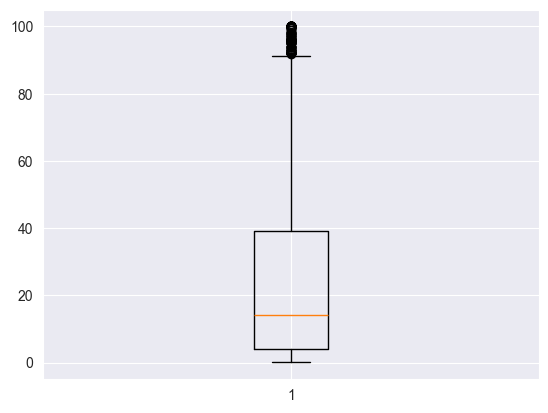

In [111]:
plt.boxplot(df['value'])

<Axes: ylabel='Density'>

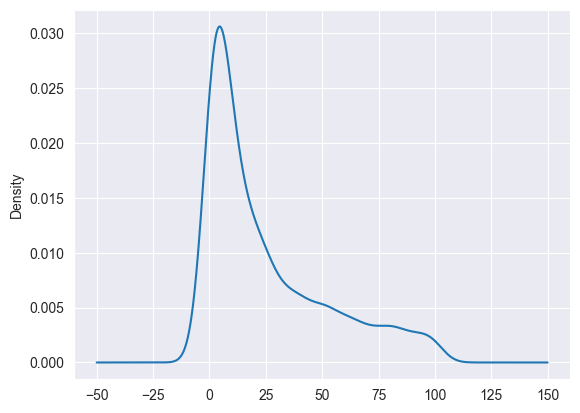

In [112]:
df['value'].plot.density()

In [113]:
df['value_type'].unique()

array(['EC50', 'Ki', 'Log Ki', 'IC50', 'Kieq', 'Activity', 'Kd', 'Kb'],
      dtype=object)

In [114]:
df[df['value_type'] == 'Kb']

,id,smiles,value_type,value,units
3500,CHEMBL4637806,CCCCCCc1ccc(OCCCCCCCCCCC(=O)NCC2CC2)cc1OC,Kb,30.61,nM


In [115]:
df.to_csv("chembl253_final.csv")

In [116]:
data = pd.read_csv('chembl218.csv', delimiter=";")

C:\Users\user\AppData\Local\Temp\ipykernel_9032\4027638988.py:1: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('chembl218.csv', delimiter=";")


In [117]:
data.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL2218896,NABILONE,4.0,372.55,1.0,6.26,2,CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)C1CCC(=O)CC21,Ki,'=',...,SINGLE PROTEIN,CHEMBL1828497,1,Scientific Literature,Eur J Med Chem,2011.0,CHEMBL3308072,NaN,NaN,NaN
1,CHEMBL570159,NaN,NaN,612.61,2.0,8.46,20,CCc1c(C(=O)NCCCCNc2c3c(nc4ccccc24)CCCC3)nc(-c2...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1156813,1,Scientific Literature,J Med Chem,2010.0,CHEMBL3308072,NaN,NaN,NaN
2,CHEMBL156027,NaN,NaN,474.37,0.0,4.90,45,O=C(NS(=O)(=O)c1ccc(Cl)cc1)N1CC(c2ccccc2)C(c2c...,pA2,NaN,...,SINGLE PROTEIN,CHEMBL1148395,1,Scientific Literature,J Med Chem,2004.0,CHEMBL3308072,NaN,NaN,NaN
3,CHEMBL345466,NaN,NaN,520.96,2.0,5.13,29,C/N=C(\NS(=O)(=O)c1ccc(C(F)(F)F)cc1)N1CC(c2ccc...,Kd,'=',...,SINGLE PROTEIN,CHEMBL1148395,1,Scientific Literature,J Med Chem,2004.0,CHEMBL3308072,NaN,NaN,NaN
4,CHEMBL158784,RAC-IBIPINABANT,NaN,487.41,0.0,4.76,67,CN/C(=N\S(=O)(=O)c1ccc(Cl)cc1)N1CC(c2ccccc2)C(...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1148395,1,Scientific Literature,J Med Chem,2004.0,CHEMBL3308072,NaN,NaN,NaN


In [118]:
df = data[['Molecule ChEMBL ID', 'Smiles', 'Standard Type','Standard Value', 'Standard Units']].copy()
df.rename(columns = {'Molecule ChEMBL ID':'id', 'Smiles': 'smiles', 'Standard Type': 'value_type', 'Standard Value' : 'value', 'Standard Units' : 'units'}, inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20913 entries, 0 to 20912
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20913 non-null  object 
 1   smiles      20839 non-null  object 
 2   value_type  20913 non-null  object 
 3   value       17636 non-null  float64
 4   units       17728 non-null  object 
dtypes: float64(1), object(4)
memory usage: 817.0+ KB


In [120]:
df['units'].unique()

array(['nM', nan, '%', 'uM', 'pmol', 'degrees C', 'kcal/mol', 'pmol/mg',
       "10'5/M/s", 'hr', "10'-4/s", 'fmol/mg', "10'-5/s", '10^3nM',
       "10'-3/s"], dtype=object)

In [121]:
df.describe()

,value
count,1.763600e+04
mean,8.145728e+03
std,7.998992e+04
min,-2.667000e+02
25%,3.000000e+01
50%,3.815000e+02
75%,1.000000e+04
max,1.000000e+07


In [122]:
filter = ['fmol/mg', '%', 'kcal/mol', 'degrees C', "10'-4/s", 'hr', '10^3nM', "10'5/M/s", "10'-3/s", "10'-5/s", 'pmol/mg', np.nan]
df = df[~df['units'].isin(filter)]

In [123]:
df['units'].unique()

array(['nM', 'uM', 'pmol'], dtype=object)

In [124]:
df.dropna(inplace=True)

In [125]:
df['smiles'] = df['smiles'].apply(preprocess)

In [126]:
df['smiles'].duplicated().sum()

np.int64(4905)

In [127]:
df.drop_duplicates(inplace=True, subset='smiles')

In [128]:
df.describe()

,value
count,9.320000e+03
mean,1.005330e+04
std,1.087317e+05
min,-1.900000e-01
25%,9.500000e+01
50%,2.100000e+03
75%,1.000000e+04
max,1.000000e+07


In [129]:
df[df['units'] == 'pmol']

,id,smiles,value_type,value,units
1247,CHEMBL404272,CN/C(=N/S(=O)(=O)c1ccc(Cl)cc1)C1CN(c2ccccc2)C(...,Activity,0.89,pmol
1248,CHEMBL404701,CN/C(=N/S(=O)(=O)c1ccc(Cl)cc1)c1cn(-c2ccc(Cl)c...,Activity,0.55,pmol
5295,CHEMBL404700,CN/C(=N/S(=O)(=O)c1ccc(Cl)cc1)c1nc(-c2ccccc2)c...,Activity,0.60,pmol
5798,CHEMBL447695,Cc1c(NS(=O)(=O)c2nn(-c3ccc(Cl)cc3Cl)c(-c3ccc(C...,Activity,0.09,pmol
8397,CHEMBL402773,CN/C(=N/S(=O)(=O)c1ccc(Cl)cc1)c1nc(-c2ccc(Cl)c...,Activity,1.30,pmol
10063,CHEMBL272949,CN/C(=N/S(=O)(=O)c1ccc(Cl)cc1)C1CN(c2ccc(Cl)cc...,Activity,0.94,pmol
11765,CHEMBL479940,Cc1c(S(=O)(=O)NN2CCCCC2)nn(-c2ccc(Cl)cc2Cl)c1-...,Activity,0.12,pmol


In [130]:
conversion_factors = {
    'nM': 1,        
    'uM': 1000,      
    'pmol': 0.001,     
}

df['value'] = df.apply(lambda row: row['value'] * conversion_factors.get(row['units']), axis=1)

In [131]:
df.loc[df['value_type'] == 'Log Ki', 'value'] = 10 ** (df['value'])
# df.loc[df['value_type'] == 'Log Ki', 'value_type'] = 'Ki'

In [132]:
df = df[df['value'] <= 100]

In [133]:
df[df['value_type'] == 'Log Ki']

,id,smiles,value_type,value,units
60,CHEMBL559612,CCCCCCC(C)(C)c1ccc([C@@H]2C[C@H](O)CC[C@H]2CCC...,Log Ki,0.645654,nM
76,CHEMBL71810,CCCCCn1ccc(C(=O)c2cccc3ccccc23)c1,Log Ki,87.096359,nM
776,CHEMBL15848,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCCO,Log Ki,89.125094,nM
1462,CHEMBL309042,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCC(C)C(=O)NCCF,Log Ki,5.754399,nM
3672,CHEMBL41721,CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)C1CC=C(CO)C...,Log Ki,0.724436,nM
5452,CHEMBL75330,CC1=CCC2C(C1)c1c(O)cc(CCCCCF)cc1OC2(C)C,Log Ki,57.543994,nM
5966,CHEMBL74909,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCCF,Log Ki,8.511380,nM
9312,CHEMBL74662,CC1=CCC2C(C1)c1c(O)cc(CCCCC(F)(F)F)cc1OC2(C)C,Log Ki,19.952623,nM
10976,CHEMBL2062131,CCCCCCC(C)(C)c1ccc([C@H]2C[C@@H](O)CC[C@@H]2CC...,Log Ki,61.659500,nM


In [134]:
df['value_type'].unique()

array(['Ki', 'Kd', 'IC50', 'EC50', 'Log Ki', 'Ke', 'Ke(app)', 'Kb',
       'Activity', 'AC50', 'Kieq', 'K'], dtype=object)

In [135]:
df[df['value_type'] == 'K']

,id,smiles,value_type,value,units
20213,CHEMBL5267903,Cc1c(C(=O)NN2CCCCC2)nn(-c2ccc(Cl)cc2Cl)c1-c1cc...,K,5.10,nM
20214,CHEMBL5268104,Cc1c(C(=O)NC23CC4CC(CC(C4)C2)C3)nn(CCCCSC#N)c1...,K,5.76,nM


In [136]:
df.to_csv("chembl218_final.csv")